In [ ]:
#Mounting Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool
from skimage.transform import resize
import os
import skimage.io
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import manifold
import random

In [ ]:
import pickle
images_file_path = '/content/drive/MyDrive/data/images_array'
with open(images_file_path, 'rb') as f:
    images_Arr = pickle.load(f)

In [ ]:
images_train = images_Arr[:7500]
images_test = images_Arr[7500:]

In [ ]:
train_inp = []

for i in range(0, len(images_train)):
  # Resizing the image for VGG16 model architecture, and also converting the color space of image
  img_temp= images_train[i].resize((100, 100))
  img_temp = img_temp.convert('RGB')
  train_inp.append(np.array(img_temp))

In [ ]:
test_inp = []

for i in range(0, len(image_test)):
  # Resizing the image for VGG16 model architecture, and also converting the color space of image
  img_temp = image_test[i].resize((100, 100))
  img_temp = img_temp.convert('RGB')
  test_inp.append(np.array(img_temp))

In [ ]:
def __init__(self, modelName, info):
        self.modelName = modelName
        self.info = info
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        
def fit(self, X, n_epochs=50, batch_size=256):
        indices_fracs = split(fracs=[0.9, 0.1], N=len(X), seed=0)
        X_train, X_valid = X[indices_fracs[0]], X[indices_fracs[1]]
        self.autoencoder.fit(X_train, X_train,
                             epochs = n_epochs,
                             batch_size = batch_size,
                             shuffle = True,
                             validation_data = (X_valid, X_valid))
def predict(self, X):
        return self.encoder.predict(X)

def set_arch(self):

        shape_img = self.info["shape_img"]
        shape_img_flattened = (np.prod(list(shape_img)),)

        # Set encoder and decoder graphs
        if self.modelName == "simpleAE":
            encode_dim = 128

            input = tf.keras.Input(shape=shape_img_flattened)
            encoded = tf.keras.layers.Dense(encode_dim, activation='relu')(input)

            decoded = tf.keras.layers.Dense(shape_img_flattened[0], activation='sigmoid')(encoded)

        elif self.modelName == "convAE":
            n_hidden_1, n_hidden_2, n_hidden_3 = 16, 8, 8
            convkernel = (3, 3)  # convolution kernel
            poolkernel = (2, 2)  # pooling kernel

            input = tf.keras.layers.Input(shape=shape_img)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(input)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
            encoded = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)

            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(encoded)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            decoded = tf.keras.layers.Conv2D(shape_img[2], convkernel, activation='sigmoid', padding='same')(x)

        else:
            raise Exception("Invalid model name given!")

        # Create autoencoder model
        autoencoder = tf.keras.Model(input, decoded)
        input_autoencoder_shape = autoencoder.layers[0].input_shape[1:]
        output_autoencoder_shape = autoencoder.layers[-1].output_shape[1:]

        # Create encoder model
        encoder = tf.keras.Model(input, encoded)  # set encoder
        input_encoder_shape = encoder.layers[0].input_shape[1:]
        output_encoder_shape = encoder.layers[-1].output_shape[1:]

        # Create decoder model
        decoded_input = tf.keras.Input(shape=output_encoder_shape)
        if self.modelName == 'simpleAE':
            decoded_output = autoencoder.layers[-1](decoded_input)  # single layer
        elif self.modelName == 'convAE':
            decoded_output = autoencoder.layers[-7](decoded_input)  # Conv2D
            decoded_output = autoencoder.layers[-6](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-5](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-4](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-3](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-2](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-1](decoded_output)  # Conv2D
        else:
            raise Exception("Invalid model name given!")
        decoder = tf.keras.Model(decoded_input, decoded_output)
        decoder_input_shape = decoder.layers[0].input_shape[1:]
        decoder_output_shape = decoder.layers[-1].output_shape[1:]
        print("\nautoencoder.summary():")
        print(autoencoder.summary())
        print("\nencoder.summary():")
        print(encoder.summary())
        print("\ndecoder.summary():")
        print(decoder.summary())
        self.autoencoder = autoencoder
        self.encoder = encoder
        self.decoder = decoder

def compile(self, loss="binary_crossentropy", optimizer="adam"):
        self.autoencoder.compile(optimizer=optimizer, loss=acc)

def load_models(self, loss="binary_crossentropy", optimizer="adam"):
        print("Loading models...")
        self.autoencoder = tf.keras.models.load_model(self.info["autoencoderFile"])
        self.encoder = tf.keras.models.load_model(self.info["encoderFile"])
        self.decoder = tf.keras.models.load_model(self.info["decoderFile"])
        self.autoencoder.compile(optimizer=optimizer, loss=loss)
        self.encoder.compile(optimizer=optimizer, loss=loss)
        self.decoder.compile(optimizer=optimizer, loss=loss)

def save_models(self):
        print("Saving models...")
        self.autoencoder.save(self.info["autoencoderFile"])
        self.encoder.save(self.info["encoderFile"])
        self.decoder.save(self.info["decoderFile"])
        
def read_img(filePath):
    return skimage.io.imread(filePath, as_gray=False)

def read_imgs_dir(dirPath, extensions, parallel=True):
    args = [os.path.join(dirPath, filename)
            for filename in os.listdir(dirPath)
            if any(filename.lower().endswith(ext) for ext in extensions)]
    if parallel:
        pool = Pool()
        imgs = pool.map(read_img, args)
        pool.close()
        pool.join()
    else:
        imgs = [read_img(arg) for arg in args]
    return imgs
def save_img(filePath, img):
    skimage.io.imsave(filePath, img)
def plot_img(img, range=[0, 255]):
    plt.imshow(img, vmin=range[0], vmax=range[1])
    plt.xlabel("xpixels")
    plt.ylabel("ypixels")
    plt.tight_layout()
    plt.show()
    plt.close()
def plot_query_retrieval(img_query, imgs_retrieval, outFile):
    n_retrieval = len(imgs_retrieval)
    fig = plt.figure(figsize=(2*n_retrieval, 4))
    fig.suptitle("First kth similar Image Retrieval (k={})".format(n_retrieval), fontsize=15)

    # Plot query image
    ax = plt.subplot(2, n_retrieval, 0 + 1)
    plt.imshow(img_query)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(4)  # increase border thickness
        ax.spines[axis].set_color('black')  # set to black
    ax.set_title("query",  fontsize=8)  # set subplot title

    # Plot retrieval images
    for i, img in enumerate(imgs_retrieval):
        ax = plt.subplot(2, n_retrieval, n_retrieval + i + 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1)  # set border thickness
            ax.spines[axis].set_color('black')  # set to black
        ax.set_title("%d same images" % (i+1), fontsize=14)  # set subplot title

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()
def plot_tsne(X, imgs, outFile):

    def imscatter(x, y, images, ax=None, zoom=1.0):
        if ax is None:
            ax = plt.gca()
        x, y = np.atleast_1d(x, y)
        artists = []
        for x0, y0, img0 in zip(x, y, images):
            im = OffsetImage(img0, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()
        return artists

    def plot_embedding(X, imgs, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)

        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], ".", fontdict={'weight': 'bold', 'size': 9})
        if hasattr(offsetbox, 'AnnotationBbox'):
            imscatter(X[:,0], X[:,1], imgs, zoom=0.3, ax=ax)

        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title, fontsize=18)

    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, imgs, "t-SNE embeddings")
    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

def plot_reconstructions(imgs, imgs_reconstruct, outFile,
                         range_imgs=[0, 255],
                         range_imgs_reconstruct=[0, 1]):
    # Create plot to save
    assert len(imgs) == len(imgs_reconstruct)
    fig = plt.figure(figsize=(20, 4))
    fig.suptitle("Image Reconstructions", fontsize=35)
    n = min(len(imgs), 10)
    for i in range(n):

        # Plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs[i],
                   vmin=range_imgs[0],
                   vmax=range_imgs[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot reconstructed image
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(imgs_reconstruct[i],
                   vmin=range_imgs_reconstruct[0],
                   vmax=range_imgs_reconstruct[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    if outFile is None:
        plt.show()
    else:
        plt.savefig(outFile, bbox_inches='tight')
    plt.close()

def apply_transformer(imgs, transformer, parallel=True):
    if parallel:
        pool = Pool()
        imgs_transform = pool.map(transformer, [img for img in imgs])
        pool.close()
        pool.join()
    else:
        imgs_transform = [transformer(img) for img in imgs]
    return imgs_transform

def normalize_img(img):
    return img / 255.

def resize_img(img, shape_resized):
    img_resized = resize(img, shape_resized,
                         anti_aliasing=True,
                         preserve_range=True)
    assert img_resized.shape == shape_resized
    return img_resized

def flatten_img(img):
    return img.flatten("C")

def split(fracs, N, seed):
    fracs = [round(frac, 2) for frac in fracs]
    if sum(fracs) != 1.00:
        raise Exception("fracs do not sum to one!")

    # Shuffle ordered indices
    indices = list(range(N))
    random.Random(seed).shuffle(indices)
    indices = np.array(indices, dtype=int)

    # Get numbers per group
    n_fracs = []
    for i in range(len(fracs) - 1):
        n_fracs.append(int(max(fracs[i] * N, 0)))
    n_fracs.append(int(max(N - sum(n_fracs), 0)))

    if sum(n_fracs) != N:
        raise Exception("n_fracs do not sum to N!")

    # Sample indices
    n_selected = 0
    indices_fracs = []
    for n_frac in n_fracs:
        indices_frac = indices[n_selected:n_selected + n_frac]
        indices_fracs.append(indices_frac)
        n_selected += n_frac

    # Check no intersections
    for a, indices_frac_A in enumerate(indices_fracs):
        for b, indices_frac_B in enumerate(indices_fracs):
            if a == b:
                continue
            if is_intersect(indices_frac_A, indices_frac_B):
                raise Exception("there are intersections!")

    return indices_fracs

def is_intersect(arr1, arr2):
    n_intersect = len(np.intersect1d(arr1, arr2))
    if n_intersect == 0: return False
    else: return True



In [ ]:
modelName = "convAE"  # try: "simpleAE", "convAE", "vgg19"
trainModel = True
parallel = True

In [ ]:
class AutoEncoder():
    def __init__(self, modelName, info):
        self.modelName = modelName
        self.info = info
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
    def fit(self, X, n_epochs=500, batch_size=256):
        indices_fracs = split(fracs=[0.9, 0.1], N=len(X), seed=0)
        X_train, X_valid = X[indices_fracs[0]], X[indices_fracs[1]]
        self.autoencoder.fit(X_train, X_train,
                             epochs = n_epochs,
                             batch_size = batch_size,
                             shuffle = True,
                             validation_data = (X_valid, X_valid))

    # Inference
    def predict(self, X):
        return self.encoder.predict(X)

    # Set neural network architecture
    def set_arch(self):

        shape_img = self.info["shape_img"]
        shape_img_flattened = (np.prod(list(shape_img)),)

        # Set encoder and decoder graphs
        if self.modelName == "simpleAE":
            encode_dim = 128

            input = tf.keras.Input(shape=shape_img_flattened)
            encoded = tf.keras.layers.Dense(encode_dim, activation='relu')(input)

            decoded = tf.keras.layers.Dense(shape_img_flattened[0], activation='sigmoid')(encoded)

        elif self.modelName == "convAE":
            n_hidden_1, n_hidden_2, n_hidden_3 = 16, 8, 8
            convkernel = (3, 3)  # convolution kernel
            poolkernel = (2, 2)  # pooling kernel

            input = tf.keras.layers.Input(shape=shape_img)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(input)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)
            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
            encoded = tf.keras.layers.MaxPooling2D(poolkernel, padding='same')(x)

            x = tf.keras.layers.Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(encoded)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            x = tf.keras.layers.Conv2D(n_hidden_1, convkernel, activation='relu')(x)
            x = tf.keras.layers.UpSampling2D(poolkernel)(x)
            decoded = tf.keras.layers.Conv2D(shape_img[2], convkernel, activation='sigmoid', padding='same')(x)

        else:
            raise Exception("Invalid model name given!")

        # Create autoencoder model
        autoencoder = tf.keras.Model(input, decoded)
        input_autoencoder_shape = autoencoder.layers[0].input_shape[1:]
        output_autoencoder_shape = autoencoder.layers[-1].output_shape[1:]

        # Create encoder model
        encoder = tf.keras.Model(input, encoded)  # set encoder
        input_encoder_shape = encoder.layers[0].input_shape[1:]
        output_encoder_shape = encoder.layers[-1].output_shape[1:]

        # Create decoder model
        decoded_input = tf.keras.Input(shape=output_encoder_shape)
        if self.modelName == 'simpleAE':
            decoded_output = autoencoder.layers[-1](decoded_input)  # single layer
        elif self.modelName == 'convAE':
            decoded_output = autoencoder.layers[-7](decoded_input)  # Conv2D
            decoded_output = autoencoder.layers[-6](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-5](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-4](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-3](decoded_output)  # Conv2D
            decoded_output = autoencoder.layers[-2](decoded_output)  # UpSampling2D
            decoded_output = autoencoder.layers[-1](decoded_output)  # Conv2D
        else:
            raise Exception("Invalid model name given!")
        decoder = tf.keras.Model(decoded_input, decoded_output)
        decoder_input_shape = decoder.layers[0].input_shape[1:]
        decoder_output_shape = decoder.layers[-1].output_shape[1:]

        # Generate summaries
        print("\nautoencoder.summary():")
        print(autoencoder.summary())
        print("\nencoder.summary():")
        print(encoder.summary())
        print("\ndecoder.summary():")
        print(decoder.summary())

        # Assign models
        self.autoencoder = autoencoder
        self.encoder = encoder
        self.decoder = decoder

    # Compile
    def compile(self, loss="binary_crossentropy", optimizer="adam"):
        self.autoencoder.compile(optimizer=optimizer, loss=loss)

    # Load model architecture and weights
    def load_models(self, loss="binary_crossentropy", optimizer="adam"):
        print("Loading models...")
        self.autoencoder = tf.keras.models.load_model(self.info["autoencoderFile"])
        self.encoder = tf.keras.models.load_model(self.info["encoderFile"])
        self.decoder = tf.keras.models.load_model(self.info["decoderFile"])
        self.autoencoder.compile(optimizer=optimizer, loss=loss)
        self.encoder.compile(optimizer=optimizer, loss=loss)
        self.decoder.compile(optimizer=optimizer, loss=loss)

    # Save model architecture and weights to file
    def save_models(self):
        print("Saving models...")
        self.autoencoder.save(self.info["autoencoderFile"])
        self.encoder.save(self.info["encoderFile"])
        self.decoder.save(self.info["decoderFile"])

In [ ]:
train_inp = np.array(train_inp)
test_inp = np.array(test_inp)
shape_img = train_inp[0].shape
outDir = "/content/drive/My Drive/Images_ML/Output_Images"
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [ ]:
class ImageTransformer(object):

    def __init__(self, shape_resize):
        self.shape_resize = shape_resize

    def __call__(self, img):
        img_transformed = resize_img(img, self.shape_resize)
        img_transformed = normalize_img(img_transformed)
        return img_transformed

transformer = ImageTransformer(shape_img)
print("Applying image transformer to training images...")
imgs_train_transformed = apply_transformer(train_inp, transformer, parallel=parallel)

Applying image transformer to training images...


In [ ]:
print("Applying image transformer to test images...")
imgs_test_transformed = apply_transformer(test_inp, transformer, parallel=parallel)

Applying image transformer to test images...


In [ ]:
X_train = np.array(imgs_train_transformed).reshape((-1,) + (100, 100, 3))
X_test = np.array(imgs_test_transformed).reshape((-1,) + (100, 100, 3))
print(" X_train.shape = {}".format(X_train.shape))
print("X_test.shape = {}".format(X_test.shape))

 X_train.shape = (7500, 100, 100, 3)
X_test.shape = (992, 100, 100, 3)


In [ ]:
path = '/content/drive/MyDrive/Images_ML/training_features_vae_normal'
with open(path, 'rb') as f:
    features_normal = pickle.load(f)

In [ ]:
path = '/content/drive/MyDrive/Images_ML/testing_features_vae_normal'
with open(path, 'rb') as f:
    features_normal_testing = pickle.load(f)

In [ ]:
features_normal.shape

(992, 6272)

In [ ]:
features_normal[9].shape

(6272,)

Predict Similar Images

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import random
from urllib.parse import urlparse
from scipy.spatial.distance import cityblock
import cv2

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from pathlib import Path
from PIL import Image

In [ ]:
def plot_images(num_images, similar_images):

  #Displaying Similar Images with the distance metric
  axes=[]
  figure = plt.figure(figsize=(18,14), edgecolor='black')

  for i in range(num_images):
      axes.append(figure.add_subplot(4, 5, i+1))
      rank = 'Rank-' + str(i+1)
      axes[-1].set_title(rank + '\nScore: '+ str(similar_images[i][0]))  
      plt.imshow(similar_images[i][1])
      plt.axis('off')
  
  figure.tight_layout()
  plt.show()

In [ ]:
#Euclidean distance between features of each image in database with the query image
def euclidian_dist(features, query_feature):
  euclidean_dists = np.linalg.norm(features - query_feature, axis=1)
  return euclidean_dists

#Cosine Similarity between features of each image in database with the query image
def cosine_similarity(features, query_feature):
  cosine_similarity_scores = features.dot(query_feature) / (np.linalg.norm(features, axis=1) * np.linalg.norm(query_feature))
  return cosine_similarity_scores

#Manhattan distance between features of each image in database with the query image
def manhattan_dist(features, query_feature):
  manhattan_dists = []
  for i in range(len(features)):
    manhattan_dists.append(cityblock(features[i], query_feature))
  return np.array(manhattan_dists)

In [ ]:
def predict_similar_images(index, num_images, eval_metric):

  #Displaying query Image first
  print("Query Image :")
  query_img = images_test[index]
  display(query_img)
  print('--------------------------------\n')

  #extracting features of query file
  # Resizing the image for VGG16 model architecture, and also converting the color space of image
  '''query_img = query_img.resize((224, 224))
  query_img = query_img.convert('RGB')

  # Reformat and preprocessing the image
  img = image.img_to_array(query_img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  # Extracting features of current index image
  query_feature = cnn_model.predict(img)[0]'''
  query_feature = features_normal_testing[index]
  query_feature_norm = np.linalg.norm(query_feature)
  query_feature /= query_feature_norm

  #features_file_path = "/content/drive/My Drive/data/features_VGG16_kmeans.npy"
  features = features_normal

  #Computing similarity/distances between query image and all images based on extracted features
  #Also sorting resultant metrics to get top k similar images
  if eval_metric == 'cosine':
    metric = cosine_similarity(features, query_feature)
    similar_images_index = np.flip(np.argsort(metric))[:num_images]
  elif eval_metric == 'manhattan':
    metric = manhattan_dist(features, query_feature)
    similar_images_index = np.argsort(metric)[:num_images]
  else:
    metric = euclidian_dist(features, query_feature)
    similar_images_index = np.argsort(metric)[:num_images]

  similar_images = []
  for i in similar_images_index:
    similar_images.append((round(metric[i],5), images_train[i]))

  #Displaying Similar Images with the distance metric
  print('Similar Images')
  plot_images(num_images, similar_images)


Enter Input Index: 34
Enter Number of Similar Images to be predicted (Upto 20): 12


------------------------------------------------------------------------
	 SIMILAR IMAGES BASED ON MANHATTAN DISTANCE
------------------------------------------------------------------------
Query Image :


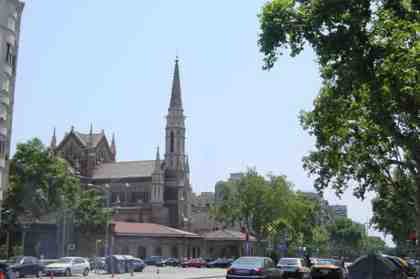

--------------------------------

Similar Images


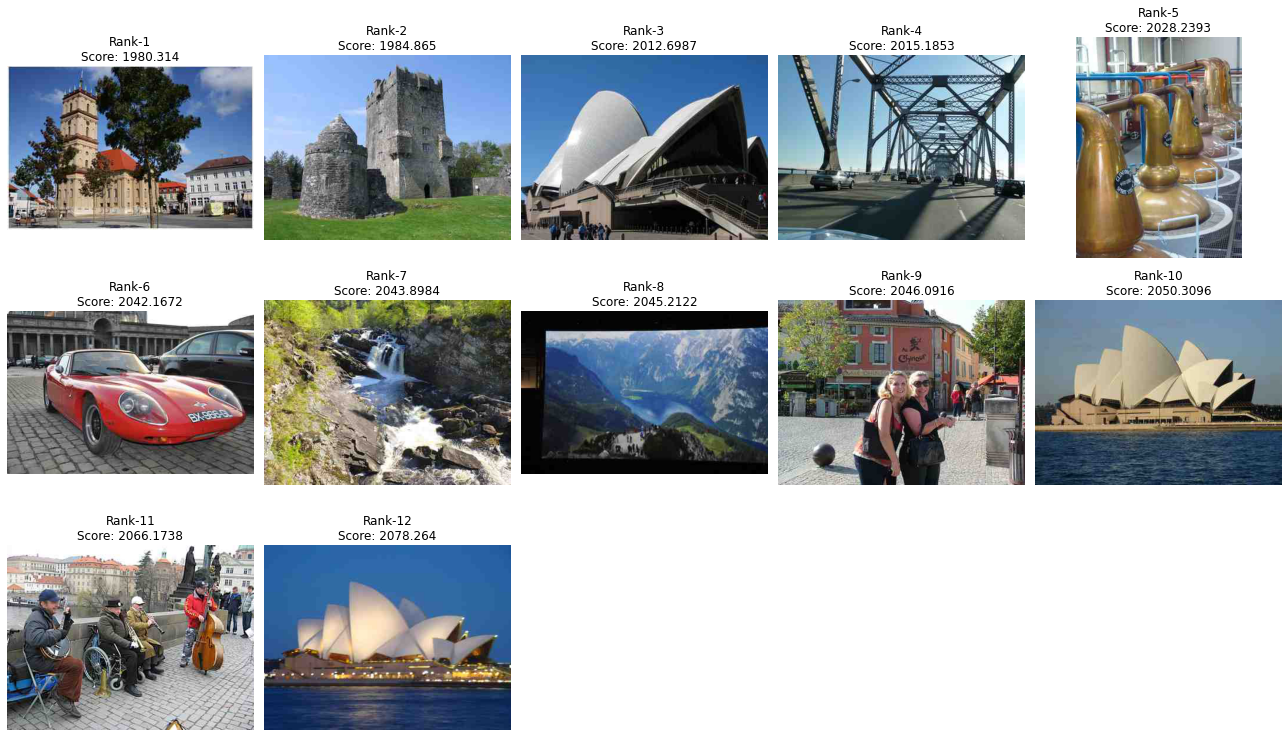



------------------------------------------------------------------------
	 SIMILAR IMAGES BASED ON EUCLIDEAN DISTANCE
------------------------------------------------------------------------
Query Image :


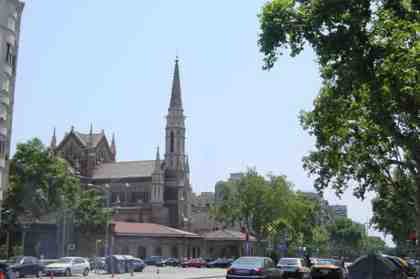

--------------------------------

Similar Images


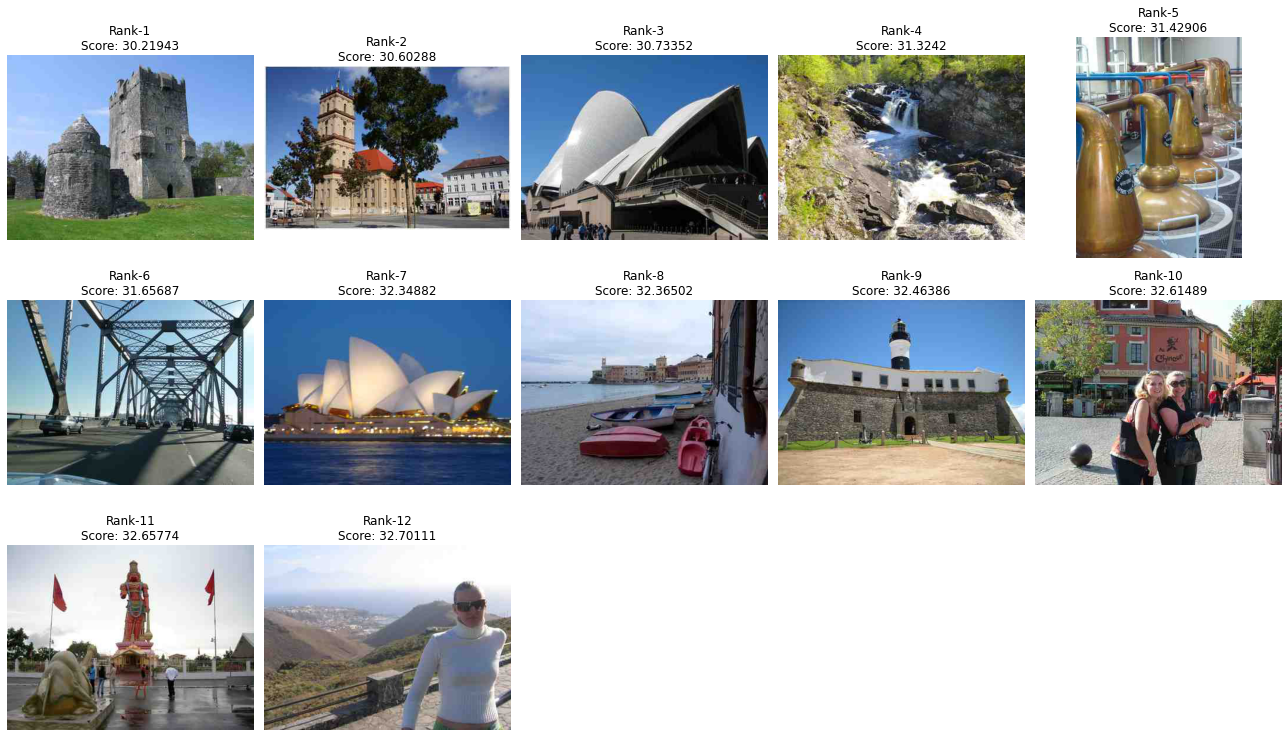



------------------------------------------------------------------------
	 SIMILAR IMAGES BASED ON COSINE SIMILARITY
------------------------------------------------------------------------
Query Image :


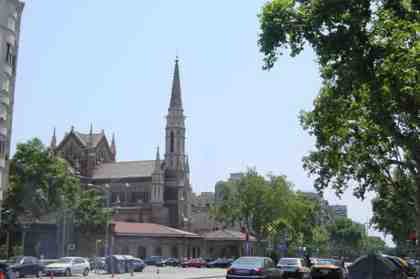

--------------------------------

Similar Images


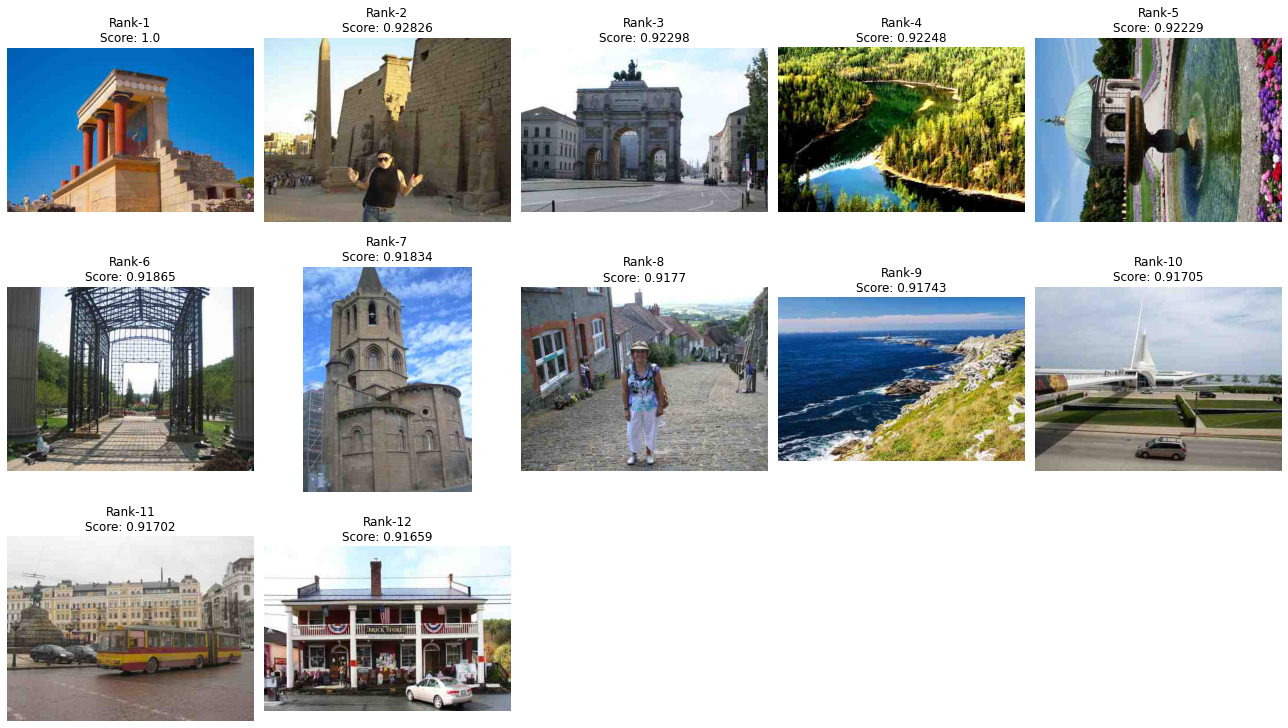

In [ ]:
index = int(input("Enter Input Index: "))
num_images = int(input("Enter Number of Similar Images to be predicted (Upto 20): "))

print('\n')
print('------------------------------------------------------------------------')
print('\033[1m' + '\t SIMILAR IMAGES BASED ON MANHATTAN DISTANCE' + '\033[0m')
print('------------------------------------------------------------------------')
predict_similar_images(index, num_images, 'manhattan')

print('\n')
print('------------------------------------------------------------------------')
print('\033[1m' + '\t SIMILAR IMAGES BASED ON EUCLIDEAN DISTANCE' + '\033[0m')
print('------------------------------------------------------------------------')
predict_similar_images(index, num_images, 'euclidean')

print('\n')
print('------------------------------------------------------------------------')
print('\033[1m' + '\t SIMILAR IMAGES BASED ON COSINE SIMILARITY' + '\033[0m')
print('------------------------------------------------------------------------')
predict_similar_images(index, num_images, 'cosine')